In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple 

#collections gives arrays of planets 

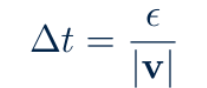

issue with this is v=0

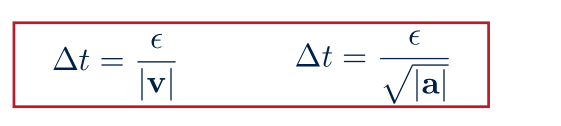

how do you pick epsilon: we are just picking a samll number 
this will be used to adjust? 

* sync needs many little steps, and a carful selections of the last little step to align 

* loops: Global, over planets, ..? 

* 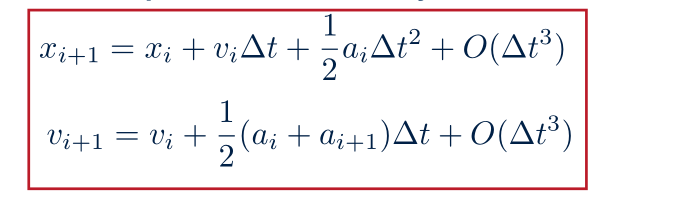 


* This is a-symmetric, and not time reverseable 
used to evolve and solve differential equations, what differentials? 
* we evolve the position in steps and then compute acceleration 
> * then obtain velocity 

* problem: does not conserve energy ^ these equations 
* dealing with a conservative force, gravity, thus all energy is the same 
* cental potential, point at the sun, 
> * if you loose energy the orbit will not close on itself, it will spiral to the center (sun) 

* Fix by: leapfrog Integration 

* the orbit is maintained cont. in Leapfrog: 
* time reversible 
* run forwarnd and backward, the orbit is the same just in reverse 
> * obey the hamoltonian impples descrete energy, energy is conserved 
> * Complutes the energy 

* 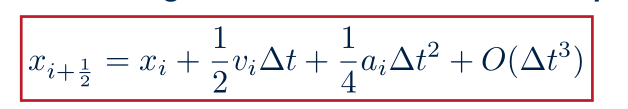
* full steps used velocity 
* half steps acceleration 

* linear order taylor series going to the midpoint 
* ai1/2 is only calculated at the midpoint, and is ued to evove the equation from the begining to the end 
* to take last half step used xi+a 

* this is only first order accurate, 
# adjust the first step for better aprox 
* 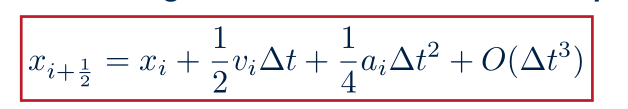

* this is only used at the start and then continues as other equations 

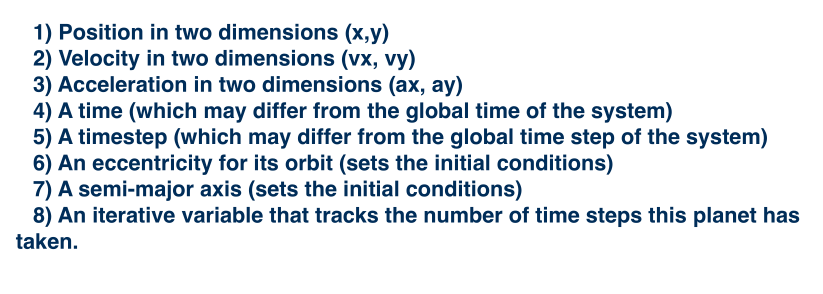

* information in the class planet 

In [2]:
class planet():
    'A planet in our solar system'
    
    #initialization function, takes the class itself, and the following 
    #arguments
    
    def __init__(self, semimajor, eccentricity):
        self.x   = np.zeros(2)  #x,y positions as an array.. #used to be np.array
        self.v   = np.zeros(2)   #x,y velocity
        self.a_g = np.zeros(2) #x,y acceleration
        self.t   = 0.0             #current time 
        self.dt  = 0.0           #current timestep 
        self.a   = semimajor     #of the orbit- semimajor axis 
        self.e   = eccentricity  #of the ofbit- eccentricity of orbit
        self.istep = 0         #keep track of the steps we take 
                               #current integer timestep 
        
        self.name = ""
        
# seems like these elements will be overwritten as we go 


In [3]:
solar_system = {'M_sun': 1.0, 'G': 39.4784176043574320}
#units Au, solarmasses, secords ?

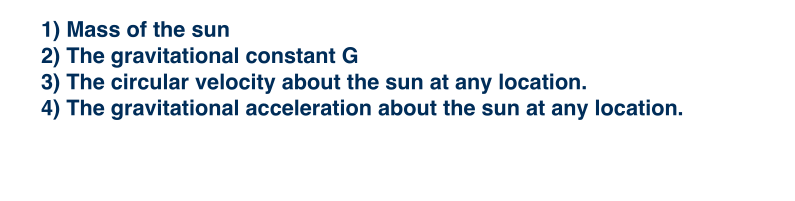
* solar_system is a dictionary of some constants

In [4]:
def SolarCircularVelocity(p): #removed an arugment in class( kept underscores )
    
    G = solar_system['G']
    M = solar_system['M_sun']
    r = (p.x[0]**2 + p.x[1]**2)**0.5  #p.x0 and p.x1 (ydirection) ?
    
    
    #return the circular velocity 
    
    return (G*M/r)**0.5 #Au/yr 

In [5]:
def SolarGravitationalAacceleration(p): 
    '''This returns the x and y components of the acceleratoin'''
    
    G = solar_system['G']
    M = solar_system['M_sun']
    r = (p.x[0]**2 + p.x[1]**2)**0.5
    
    #acceleration in Au/yr/yr (magnitude)
    a_grav = -1.0*(G*M/r**2)
    
    #the above is the mag of accelleration 
    #we need the angle between vectors (which vecotrs?)
    
    #must point to the center regardless of where we are
    
    #find the angle at this position
    if (p.x[0]== 0.0):   #we are on the y-axis somewhere
        if (p.x[1]>0.0):  #along the positive y axis 
            theta = 0.5*np.pi  #angle known 
        
        else: #negative y axis 
            theta = 1.5*np.pi #known angle 
    #otherwise
    else: 
        theta = np.arctan2(p.x[1], p.x[0]) #value 2 takes two argumentts 
        # edit :theta = np.atan(p.x[1], p.x[0])
        
        
    #set the x and y componets of the velocity     
    #components this is a triangle     
    #p.a_g[0] = a_grav * np.cos(theta)
    #p.a_g[1] = a_grav * np.sin(theta)
    
    #pass a planet the acceleration is updated a_g is the variable 
    
    return a_grav*np.cos(theta), a_grav*np.sin(theta)


# Note: the markdown below
* new slides contained an updated form, see above 


def solar_gravitational_acceleration(p, solar_system): 
    
    G = solar_system['G']
    M = solar_system['M_sun']
    r = (p.x[0]**2 + p.x[1]**2)**0.5
    
    #acceleration in Au/yr/yr
    a_grav = -1.0*G*M/r**2
    
    #the above is the mag of accelleration 
    #we need the angle between vectors (which vecotrs?)
    
    
    #find the angle at this position
    if p.x[0]==0.0:   #on the y-axis somewhere
        if p.x[1] >0.0:  #along the positive y axis 
            theta =0.5*np.pi  #angle known 
        
        else: #negative y axis 
            theta = 1.5*np.pi #known angle 
    else: 
        theta = np.atan(p.x[1], p.x[0])
        
    #set the x and y componets of the velocity     
    #components this is a triangle     
    p.a_g[0] = a_grav * np.cos(theta)
    p.a_g[1] = a_grav * np.sin(theta)
    
    #pass a planet the acceleration is updated a_g is the variable 



# <span style= "color: red"> Double check this block is correct </span> 

In [6]:
def calc_dt(p):
    
    #time step 
    #integration tolerance 
    ETA_TIME_STEP = .0004  #given by prof 
    
    #computing timestep
    eta = ETA_TIME_STEP
    
    v = (p.v[0]**2 + p.v[1]**2)**0.5  #in x y directions #this is a mag calcuation of V and A 
    
    a = (p.a_g[0]**2 + p.a_g[1]**2)**0.5 
    
    dt = eta * np.fmin(1./np.fabs(v),1./np.fabs(a)**0.5) #not on slide 
    
    return dt 

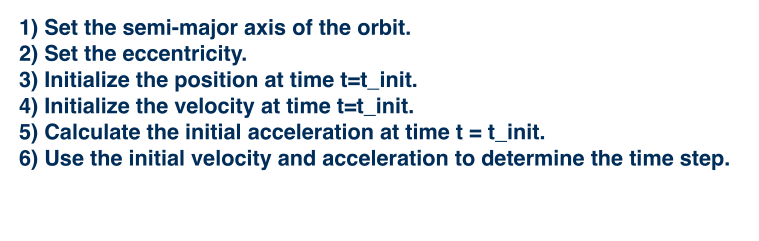

In [7]:
#define initial conditions 
def SetPlanet(p, i): 
    
    AU_in_km = 1.495979e+8 #an Au in km (could not find Au values)
    
    #circular velocity
    #initial values will be zero 
    v_c = 0.0               #circular velocity in Au/yr
    v_e = 0.0               #velocity at perihelion in Au/yr
    
    #planet- by planet initial conditions
    #Mercury 
    if i == 0: 
        
        #.a = major axis 
        #semi-major axis in Au
        p.a = 57909227.0/ AU_in_km   #not in slide 
        
        #.e eccentricity 
        p.e = 0.20563593
        p.name = 'Mercury'
        
    #Venus   
    elif i ==1: 
        
        #semi-major axis in Au
        p.a = 108209475.0/ AU_in_km   #not in slide 
        
        #.e eccentricity 
        p.e = 0.00677672
        p.name = 'Venus'
        
    #Earth   
    elif i==2: 
        
        #semi-major axis in Au
        p.a = 1.0 
        
        #.e eccentricity 
        p.e = 0.01671123
        p.name = 'Earth'
        

    #set remaining properties     
    p.t = 0.0 #inital time zero 
    p.x[0] = p.a*(1.0-p.e) #inital position = pereheloon distance at start (peri in the x-direction )
    p.x[1] = 0.0 
    
    #if at peri we can calculate the v_c 
    #pass the planet to the solar_cir_vel 
    
    #get equiv circular velocity
    v_c = SolarCircularVelocity(p) #shouold this be p[i]?
    
    
    #get velocity at peri by the folowing 
    v_e = v_c * (1 + p.e)**0.5 
    
    #set velocity 
    p.v[0] = 0.0  #no x veloctiy at peri (on x-axis moving in the y direction)
    p.v[1] = v_e  #y is at peri (counter clockwise)
    
    
    #calc grav acceleration from the sun
    p.a_g = SolarGravitationalAacceleration(p)
    
    #set out time step 
    p.dt = calc_dt(p)
    
    #this sets all of our initial conditions of our planets 

Conservative system we need a function to take the special first step 
and a funciton to take a full step in x and full step in v 
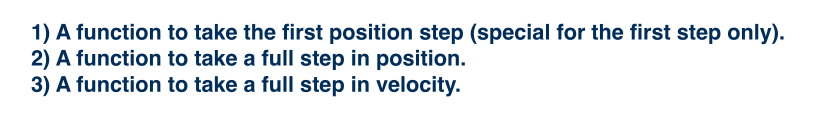

# Write a leep frog integrator 
this will realign the fuunctions if there are out of sinc 

In [8]:
def x_first_step(x_i,v_i,a_i,dt):
    #leapfrog integrator 
    #from the slides? 
    #particular step 
    
    #x_1/2 = x_0 + 1/2 v_0 Delta_t + 1/4 a_0 Delta t^2
     
    return x_i + 0.5*v_i*dt + 0.25*a_i*dt**2 


In [9]:
def v_full_step(v_i, a_ipoh, dt): 
    #full step in v 
    #will not use all the variables, but will include them anyhow. 
    
    #v_i+1 = v_i +a_i+1/2 Delta t 
    
    return v_i + a_ipoh*dt

# Once again an edit was made: 
* see above 

def v_full_step(x_i, v_i, a_ipoh, dt): 
    #full step in v 
    #will not use all the variables, but will include them anyhow. 
    
    #v_i+1 = v_i +a_i+1/2 Delta t 
    
    return v_i + a_ipoh*dt

In [10]:
def x_full_step(x_ipoh, v_ipl, a_ipoh, dt): 
    
    #x_3/2 = x_1/2 + v_i+1 Delta t 
    
    return x_ipoh + v_ipl*dt 

# write a function to save the results 

In [11]:
def SaveSolarSystem(p, n_planets, t, dt, istep, ndim):
    
    #loop over number of planets
    for i in range(n_planets):
        
        #define a filename
        fname = "planet.%s.txt" % p[i].name
        
        
        if(istep==0):
            #create the file
            fp = open(fname,"w")
        else:
            #append the file
            fp = open(fname,"a")
        
        #compute the drifted velocity
        v_drift = np.zeros(ndim)
        
        for k in range(ndim):
            v_drift[k] = p[i].v[k] + 0.5*p[i].a_g[k]*p[i].dt
            
        #write the data to file
        s = "%6d\t%6.5f\t%6.5f\t%6d\t%6.5f\t%6.5f\t% 6.5f\t% 6.5f\t% 6.5f\t% 6.5f\t% 6.5f\t% 6.5f\n" % \
            (istep,t,dt,p[i].istep,p[i].t,p[i].dt,p[i].x[0],p[i].x[1],v_drift[0],v_drift[1], \
             p[i].a_g[0], p[i].a_g[1])
        fp.write(s)
        #12 values are given here 
        
        #close the file
        fp.close()


def SaveSolarSystem(p, n_planets, t, dt, istep, ndim):
    
    #loop over the number of planets 
    for i in range(n_planets): 
        
        #define a filename 
        fname = 'planet.%s.txt' % p[i].name  #%s. is the string of the name of the planet 
        
        if istep == 0: #checks if it's the first time used 
            
            #create the file on the first timestep 
            fp = open(fname, 'w') #writes
            
        else: #otherwise, don't overwrite just append
            
            #append the file on subsequent timesteps 
            fp = open(fname, 'a') #appends ? 
            
            
            
        #drift/ do not store the velocity to move the -?function? along 
        
        #compute the drifted properties of the planet 
        v_drift = np.zeros(ndim) #dim is 2 
        
        for k in range(ndim): 
            v_drift[k] = p[i].v[k] + 0.5*p[i].a_g[k]*p[i].dt #this moves the velocity 1/2 step 
            
        #write the data to file
        s = "%6d\t%6.5f\t%6.5f\t%6d\t%6.5f\t%6.5f\t% 6.5f\t% 6.5f\t% 6.5f\t% 6.5f\t% 6.5f\t% 6.5f\n" % \
            (istep, t, dt, p[i].istep, p[i].t, p[i].dt, p[i].x[0], p[i].x[1], v_drift[0], v_drift[1], \
            p[i].a_g[0], p[i].a_g[1])
        
        #s = '%6d\t%6.5f\t%6.5f\t%6d\t%6.5f\t%6.5f\t% 6.5f\t% 6.5f\t% 6.5f\t% 6.5f\t% 6.5f\t% 6.5f\n' % \
            #(istep,t,dt, p[i].istep, p[i].t, p[i].dt, p[i].x[0], p[i].x[1], v_drift[0],v_drift[1], \
             #p[i].a_g[0], p[i].a_g[1])
        
        
        fp.write(s)
        
        #close the file 
        fp.close()

# Write a function to evolve the solar system 

In [12]:
def EvolveSolarSystem(p,n_planets,t_max):
    #number of spatial dimensions
    ndim = 2
    #define the first timestep
    dt = 0.5/365.25
    #define the starting time
    t = 0.0
    #define timestep
    istep = 0
    #save our initial conditions
    
    SaveSolarSystem(p,n_planets,t,dt,istep,ndim)
    
    #begin a loop over the global timescale
    
    while(t<t_max):        
        if(t+dt>t_max):
            dt = t_max - t # limit the step to align with t_max        
            #evolve each planet
        for i in range(n_planets):
            while(p[i].t<t+dt):
                #take the first step according to a verlet scheme
                if(p[i].istep==0):
                    #take the first step
                    for k in range(ndim):
                        
                        p[i].x[k] = x_first_step(p[i].x[k],p[i].v[k],p[i].a_g[k],p[i].dt)
                        
                    #update the acceleration
                    p[i].a_g = SolarGravitationalAcceleration(p[i])
                    #update the time by 1/2dt
                    p[i].t += 0.5*p[i].dt
                    #update the timestep
                    p[i].dt = calc_dt(p[i])
                    #continue with a normal step               
                    #limit the planet’s timestep to align with the global step
                if(p[i].t + p[i].dt > t+dt):
                    p[i].dt = t + dt - p[i].t
                    #evolve the velocity
                for k in range(ndim):
                    p[i].v[k] = v_full_step(p[i].v[k],p[i].a_g[k],p[i].dt)
                    #evolve the position
                for k in range(ndim):
                    p[i].x[k] = x_full_step(p[i].x[k],p[i].v[k],p[i].a_g[k],p[i].dt)
                    #update the acceleration
                p[i].a_g = SolarGravitationalAcceleration(p[i])
                #update the time
                p[i].t += p[i].dt
                #compute the new timestep
                p[i].dt = calc_dt(p[i])
                #update the integer timestep
                p[i].istep += 1
                #update the global system time
                
        t+=dt
        #update the global timestep number
        istep += 1   #output the current state
        SaveSolarSystem(p,n_planets,t,dt,istep,ndim)
    print('Time t = ',t)
    print('Maximum t = ',t_max)
    print('Number of steps = ',istep)
    return
 



def EvolveSolarSystem(p, n_planets,t_max): 
    
    #number of spatial dimensoins 
    ndim = 2 
    
    #define the first timestep 
    dt = 0.5/365.25 # 1/2 days time
    
    #define the starting time 
    t = 0.0 
    
    #define the starting timestep 
    istep = 0 
    
    #save the inital conditoins 
    SaveSolarSystem(p,n_planets, t, dt, istep, ndim)
    
    #begin a loop over the global timescale 
    while (t<t_max): 
        
        #check to see if the next step exceeds the 
        #max time. If so, take a smaller step 
        
        if (t+dt>t_max): 
            dt = t_max - t #limit the step to align with t_max 
            
        #evolve each planet 
        
        for i in range(n_planets): 
            
            while(p[i].t<t+dt): 
                
                #special case for istep == 0 
                if p[i].istep == 0: 
                    
                    #take the first step according to a varlet scheme 
                    for k in range(ndim): 
                        p[i].x[k] = x_first_step(p[i].x[k],p[i].v[k],p[i].a_g[k],p[i].dt) #not p[i].dt
                        
                    #update the acceleration 
                    p[i].a_g = SolarGravitationalAacceleration(p[i]) #not p[i]??
                    
                    #update the time by 1/2dt 
                    p[i].t += 0.5*p[i].dt
                    
                    #update the timestep 
                    p[i].dt = calc_dt(p[i])
                    
                #continue whith normal step 
                
                #limit to align with the gloabl timestep 
                if (p[i].t + p[i].dt > t+dt): 
                    
                    p[i].dt = t+dt-p[i].t
                    
                    
                #evolve the velocity 
                for k in range(ndim): 
                    p[i].v[k] = v_full_step(p[i].v[k], p[i].a_g[k], p[i].dt)
                    
                #evolve the positoin 
                for k in range(ndim): 
                    p[i].x[k] = x_full_step(p[i].x[k], p[i].v[k], p[i].a_g[k], p[i].dt)
                    
                #update the acceleration 
                p[i].a_g = solar_gravitaional_acceleration(p[i])
                
                #update by dt 
                p[i].t += p[i].dt 
                
                #compute the new timestep 
                p[i].istep += 1 
            
            #now update the global system time 
            t += dt 
            
            #update the global step number 
            istep += 1 
            
            #output the current state 
            SaveSolarSystem(p,n_planets, t, dt, istep, ndim)
            
    #print the final Steps and time 
    print('Time t = ', t)
    print('Max t = ', t_max)
    print('Max number of steps = ', istep)
    
    #end of evolution 

# Create a routine to read the data 


In [13]:
def read_twelve_arrays(fname): 
    fp = open(fname, 'r')  #fr file pointer, representation of info in file 
    fl = fp.readlines() #built in function read all the lines, retures array, the elements in array are strnigs 
    n = len(fl) 
    
    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)
    f = np.zeros(n)
    g = np.zeros(n)
    h = np.zeros(n)
    j = np.zeros(n)
    k = np.zeros(n)
    l = np.zeros(n)
    m = np.zeros(n) #have n elements, # of lines as the length of the arrayin file 
    p = np.zeros(n) #each array is a coloum in the file 
    
    for i in range(n): #loop through file 
        a[i] = flaot(fl[i].split()[0]) #fl is the array, each element is a line in the file, fl[i] is a line 
        b[i] = flaot(fl[i].split()[1]) #stings have ''split' natural split (series of tabs) they will be seperated out
        c[i] = flaot(fl[i].split()[2]) #ex: sentance each word in the sentance (each element is a word)
        d[i] = flaot(fl[i].split()[3]) #12 coloummbs 0 entry in the 1st colomn..? 
        f[i] = flaot(fl[i].split()[4]) #split into 12 strings, 12 coloums seperated by tabs 
        g[i] = flaot(fl[i].split()[5]) #converted to a float 
        h[i] = flaot(fl[i].split()[6]) #each read in from the text file will be converted into a float 
        j[i] = flaot(fl[i].split()[7])
        k[i] = flaot(fl[i].split()[8])
        l[i] = flaot(fl[i].split()[9])
        m[i] = flaot(fl[i].split()[10])
        p[i] = flaot(fl[i].split()[11])
        
    return a,b,c,d,f,g,h,j,k,l,m,p
        

# Perform the integration of the Solar system

In [14]:
#set the number of planets 
#earth stats on the x-axis wit y =0 

n_planets = 3 

#set the max time of the simulation 
t_max = 2.0

#create empty list of planets 
p = []

#set the planets 
for i in range(n_planets): 
    
    #create an empty planet 
    ptmp = planet(0.0,0.0)
    
    #set the planet properties 
    SetPlanet(ptmp, i)
    
    #remember the planet 
    p.append(ptmp)
    
#evolve the solar system 
EvolveSolarSystem(p, n_planets, t_max)

NameError: name 'SolarGravitationalAcceleration' is not defined

In [ ]:
fname = 'planet.Mercury.txt'
istepMg,tMg,dtMg,istepM,tM,dtM,xM,yM,vxM,vyM,axM,ayM = read_twelve_arrays(fname)

In [ ]:
fname = 'planet.Earth.txt'
istepEg,tEg,dtEg,istepE,tE,dtE,xE,yE,vxE,vyE,axE,ayE = read_twelve_arrays(fname)

In [ ]:
fname = 'planet.Venus.txt'
istepVg,tVg,dtVg,istepV,tV,dtV,xV,yV,vxV,vyV,axV,ayV = read_twelve_arrays(fname)

In [ ]:
fig = plt.figure(figsize = (7,7))

xSun = [0.0]
ySun = [0.0]


plt.plot(xSun,ySun, 'o', color ='0.5', label = 'Sun')
plt.plot(xM[-1], yM[-1], 'o', color= 'red', label = 'Mercury')

plt.plot(xV, yV, color ='green')
plt.plot(xV[-1], yV[-1], 'o', color= 'green', label = 'Venus')


plt.plot(xE, yE, color ='blue')
plt.plot(xE[-1], yE[-1], 'o', color= 'blue', label = 'Earth')


plt.xlim([-1.25,1.25])
plt.ylim([-1.25,1.25])

plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.axes().set_aspect('equal')
plt.legend(frameone = False, loc= 2)

In [ ]:
#we have a movie with to many elements 

n = len(xM) #number of elements in the array for Muructy (same for all planets)

for i in range(n): 
    if 